In [48]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import wrds

In [49]:
df=pd.read_csv('data.csv',sep=';')
df['date'] = pd.to_datetime(df['date'])
df.head()

,permno,date,Rn,shrout,prc,mcap,mcap_l,rf,Rm,const,Rn_e,Rm_e
0,10028,1992-06-30,-0.206897,5632.0,-1.43750,8096.000,NaN,0.002928,-0.019258,1,-0.209825,-0.022186
1,10028,1992-05-29,-0.205479,5548.0,-1.81250,10055.750,8096.000,0.003030,0.006407,1,-0.208509,0.003377
2,10028,1992-04-30,-0.170455,5548.0,-2.28125,12656.375,10055.750,0.002920,0.013414,1,-0.173375,0.010494
3,10028,1992-03-31,0.419355,5548.0,2.75000,15257.000,12656.375,0.003343,-0.023699,1,0.416012,-0.027042
4,10028,1998-05-29,0.047619,4151.0,2.75000,11415.250,15257.000,0.003806,-0.025746,1,0.043813,-0.029552


**MOMENTUM**

In [50]:
#Cumulative 12 month past return for each stock:
df=df.sort_values(['permno','date']).reset_index(drop=True)
df['LN_Cret12'] = df.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values
df['Rn_f'] = df.groupby(['permno'])['Rn'].shift(-1)
df.head(13)

C:\Users\marc-\AppData\Local\Temp\ipykernel_33368\2294971662.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['LN_Cret12'] = df.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values


,permno,date,Rn,shrout,prc,mcap,mcap_l,rf,Rm,const,Rn_e,Rm_e,LN_Cret12,Rn_f
0,10001,2009-12-31,0.162621,4361.0,10.3000,44918.3000,43871.6600,0.000032,0.028475,1,0.162589,0.028443,NaN,-0.018932
1,10001,2010-01-29,-0.018932,4361.0,10.0600,43871.6600,43646.6324,0.000013,-0.037172,1,-0.018945,-0.037185,NaN,-0.000656
2,10001,2010-02-26,-0.000656,4361.0,10.0084,43646.6324,44351.3700,0.000061,0.034744,1,-0.000717,0.034683,NaN,0.020643
3,10001,2010-03-31,0.020643,4361.0,10.1700,44351.3700,69137.3000,0.000112,0.063668,1,0.020531,0.063556,NaN,0.124385
4,10001,2010-04-30,0.124385,6070.0,11.3900,69137.3000,69209.4000,0.000118,0.020036,1,0.124267,0.019918,NaN,0.004829
5,10001,2010-05-28,0.004829,6071.0,11.4000,69209.4000,66028.8000,0.000114,-0.079240,1,0.004715,-0.079354,NaN,-0.043421
6,10001,2010-06-30,-0.043421,6080.0,10.8600,66028.8000,NaN,0.000135,-0.050780,1,-0.043556,-0.050915,NaN,0.083333
7,10001,2010-07-30,0.083333,6080.0,11.7200,71257.6000,62983.0830,0.000118,0.070360,1,0.083215,0.070242,NaN,-0.111263
8,10001,2010-08-31,-0.111263,6073.0,10.3710,62983.0830,67531.7600,0.000127,-0.042864,1,-0.111390,-0.042991,NaN,0.076560
9,10001,2010-09-30,0.076560,6073.0,11.1200,67531.7600,69485.9526,0.000112,0.091628,1,0.076448,0.091516,NaN,0.032815


In [51]:
#Momentum decile weights
q = 10
#Momentum is the decile
df['Momentum'] = df.groupby('date')['LN_Cret12'].transform(lambda x: pd.qcut(x,q,labels=False, duplicates='drop'))
df['w_L'] = (df['Momentum']==q-1)*df['mcap']
df['w_S'] = (df['Momentum']==0)*df['mcap']
#Normalize the weights
df['w_L'] = df['w_L']/df.groupby(['date'])['w_L'].transform('sum')
df['w_S'] = df['w_S']/df.groupby(['date'])['w_S'].transform('sum')
df['w_Mom'] = df['w_L'] - df['w_S']
Momentum = df.groupby('date').apply(lambda x: np.sum(x['Rn_f']*x['w_Mom'])).reset_index()
Momentum['date'] =  Momentum['date'] + pd.DateOffset(months=1)
Momentum.columns = ['date','Mom_ret']

C:\Users\marc-\AppData\Local\Temp\ipykernel_33368\1208739355.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Momentum = df.groupby('date').apply(lambda x: np.sum(x['Rn_f']*x['w_Mom'])).reset_index()


In [56]:
#Generate deciles
df_momentum=df.dropna(subset=['Momentum']).copy()
df_momentum['momentum_deciles']=df_momentum.groupby('date')['Momentum'].transform(lambda x :  pd.qcut(x, 10,labels=False, duplicates='drop'))

#Equal-Weighted pfs
ret_ew = df_momentum.groupby(['date','momentum_deciles'])['Rn'].mean().reset_index()
ew_ret_mean = ret_ew.groupby('momentum_deciles')['Rn'].mean()*12
ew_ret_std = ret_ew.groupby('momentum_deciles')['Rn'].std()*(np.sqrt(12))
ew_rf_mean=df_momentum.groupby('momentum_deciles')['rf'].mean()*12
ew_sr=(ew_ret_mean-ew_rf_mean)/(ew_ret_std)



# Value-weighed pfs
df_momentum['vw_Q']=df_momentum['mcap']/(df_momentum.groupby(['date','momentum_deciles'])['mcap'].transform('sum'))
df_momentum['ret_vw'] = df_momentum['vw_Q']*df_momentum['Rn']
ret_vw = df_momentum.groupby(['date','momentum_deciles'])['ret_vw'].sum().reset_index()
vw_ret_mean = ret_vw.groupby('momentum_deciles')['ret_vw'].mean()*12
vw_ret_std = ret_vw.groupby('momentum_deciles')['ret_vw'].std()*(np.sqrt(12))
vw_rf_mean=df_momentum.groupby('momentum_deciles')['rf'].mean()*12
vw_sr=(vw_ret_mean-ew_rf_mean)/(vw_ret_std)

In [59]:
#Constuct dataframes for efficient plotting 
deciles=['Q'+ str(x) for x in np.arange(1,11)]
means=np.concatenate((vw_ret_mean.values,ew_ret_mean.values))
means_df=pd.DataFrame(zip(means,['VW']*len(vw_ret_mean.values)+['EW']*len(ew_ret_mean.values),deciles+deciles),columns=['values','type','quantile'])
stds=np.concatenate((vw_ret_std.values,ew_ret_std.values))
stds_df=pd.DataFrame(zip(stds,['VW']*len(vw_ret_mean.values)+['EW']*len(ew_ret_mean.values),deciles+deciles),columns=['values','type','quantile'])
srs=np.concatenate((vw_sr.values,ew_sr.values))
srs_df=pd.DataFrame(zip(srs,['VW']*len(vw_sr.values)+['EW']*len(ew_sr.values),deciles+deciles),columns=['values','type','quantile'])

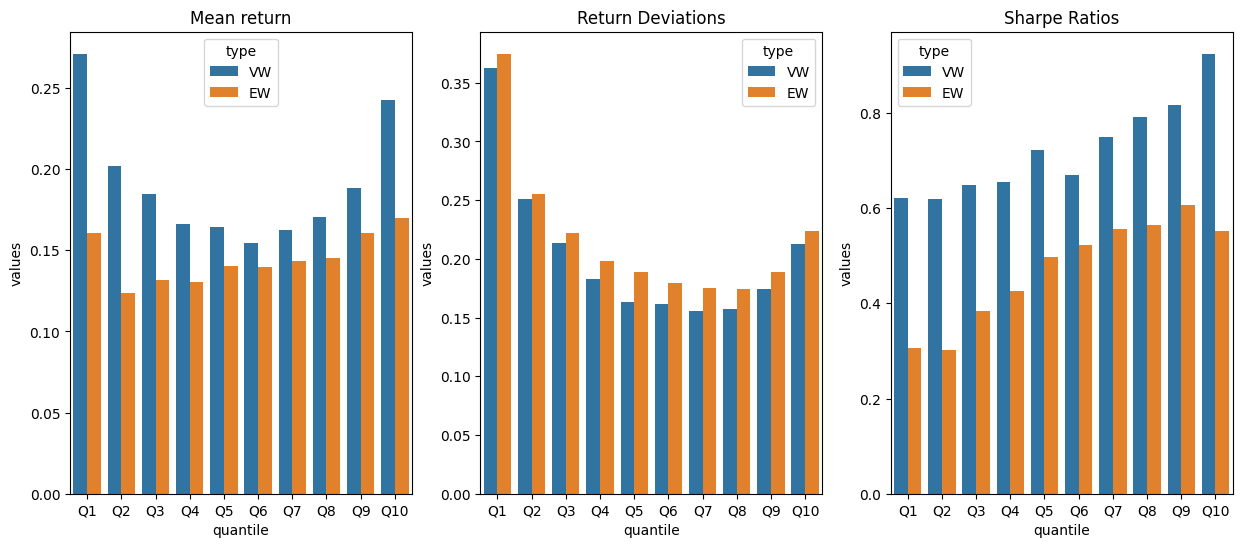

In [60]:
import seaborn as sns
# 5. Plot Means Histogram
fig, axs= plt.subplots(1,3,figsize=(15,6))
sns.barplot(means_df,x='quantile',y='values',hue='type',ax=axs[0])
sns.barplot(stds_df,x='quantile',y='values',hue='type',ax=axs[1])
sns.barplot(srs_df,x='quantile',y='values',hue='type',ax=axs[2])

axs[0].set_title('Mean return')
axs[1].set_title('Return Deviations')
axs[2].set_title('Sharpe Ratios')
plt.show()